<a href="https://colab.research.google.com/github/OracyC/douban_moive_data_analysis/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crawler

In [1]:
from bs4 import BeautifulSoup
import re
import urllib.request,urllib.error
import xlwt

# main
def main():
    baseurl = "https://movie.douban.com/top250?start="
    datalist = getData(baseurl)
    savepath = ".\\DoubanTop250.xls"
    saveData(datalist,savepath)

# movie url
findLink = re.compile(r'<a href="(.*?)">')         # create re rules
# movie poster url
findImgSrc = re.compile(r'<img.*src="(.*?)"',re.S) 
# movie name
findTitle = re.compile(r'<span class="title">(.*)</span>')
# movie rate
findRating = re.compile(r'<span class="rating_num" property="v:average">(.*)</span>')
# movie rate count
findJudge = re.compile(r'<span>(\d*)人评价</span>')
# movie description
findInq = re.compile(r'<span class="inq">(.*?)</span>')
# movie information
findBd = re.compile(r'<p class="">(.*?)</p>',re.S)

def getData(baseurl):
    datalist = []
    for i in range(0,10):
        url = baseurl + str(i*25)
        html = askURL(url)
        soup = BeautifulSoup(html,"html.parser")
        for item in soup.find_all('div',class_="item"):
            data = []
            item = str(item)
            # movie url
            link = re.findall(findLink,item)[0]
            data.append(link)
            # movie poster url
            imgSrc = re.findall(findImgSrc,item)[0]
            data.append(imgSrc)
            # movie name
            title = re.findall(findTitle,item)
            if (len(title) == 2):
                cntitle = title[0]
                data.append(cntitle)
                otitle = title[1].replace("/","")
                data.append(otitle)
            else:
                data.append(title[0])
                data.append(" ")
            # movie rate
            rating = re.findall(findRating,item)[0]
            data.append(rating)
            # movie rate count
            judge = re.findall(findJudge,item)[0]
            data.append(judge)
            # movie description
            inq = re.findall(findInq,item)
            if len(inq) != 0:
                inq = inq[0].replace("。","")
                data.append(inq)
            else:
                data.append(" ")
            # movie info
            bd = re.findall(findBd,item)[0]
            data.append(bd.strip())

            datalist.append(data)
    print(datalist)
    return datalist

def askURL(url):
    head = {
        "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36 Edg/84.0.522.61"
    }
    Urlrequest = urllib.request.Request(url,headers=head)
    html = ""
    try:
        Urlresponse = urllib.request.urlopen(Urlrequest)
        html = Urlresponse.read().decode("utf-8")
    except urllib.error.URLError as e:
        if hasattr(e,"code"):
            print(e.code)
        if hasattr(e,"reason"):
            print(e.reason)
    return html

def saveData(datalist,savepath):
    book = xlwt.Workbook(encoding="utf-8",style_compression=0)
    sheet = book.add_sheet("DoubanTop250",cell_overwrite_ok=True)
    col = ("movie_url","movie_poster_url","movie_name[zh]","movie_name[en]","movie_rate","movie_rate_count","movie_description","movie_info")
    for i in range(0,8):
        sheet.write(0,i,col[i])
    for i in range(0,250):
        print("Writing the %d line of info"%(i+1))
        data = datalist[i]
        for j in range(0,8):
            sheet.write(i+1,j,data[j])

    book.save(savepath)
if __name__ == "__main__":
    main()
    print("Crawler done！")

[['https://movie.douban.com/subject/1292052/', 'https://img2.doubanio.com/view/photo/s_ratio_poster/public/p480747492.jpg', '肖申克的救赎', '\xa0\xa0The Shawshank Redemption', '9.7', '2179553', '希望让人自由', '导演: 弗兰克·德拉邦特 Frank Darabont\xa0\xa0\xa0主演: 蒂姆·罗宾斯 Tim Robbins /...<br/>\n                            1994\xa0/\xa0美国\xa0/\xa0犯罪 剧情'], ['https://movie.douban.com/subject/1291546/', 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2561716440.jpg', '霸王别姬', ' ', '9.6', '1617012', '风华绝代', '导演: 陈凯歌 Kaige Chen\xa0\xa0\xa0主演: 张国荣 Leslie Cheung / 张丰毅 Fengyi Zha...<br/>\n                            1993\xa0/\xa0中国大陆 中国香港\xa0/\xa0剧情 爱情 同性'], ['https://movie.douban.com/subject/1292720/', 'https://img2.doubanio.com/view/photo/s_ratio_poster/public/p2372307693.jpg', '阿甘正传', '\xa0\xa0Forrest Gump', '9.5', '1645298', '一部美国近现代史', '导演: 罗伯特·泽米吉斯 Robert Zemeckis\xa0\xa0\xa0主演: 汤姆·汉克斯 Tom Hanks / ...<br/>\n                            1994\xa0/\xa0美国\xa0/\xa0剧情 爱情'], ['https://movie.douban.com/subjec

# Read in data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
data = pd.read_excel('DoubanTop250.xls')

# Feature Engineering

In [4]:
temp1 = data['movie_info'].str.split('导演: ',expand=True)[1]
data['movie_director'] = temp1.str.split('主演: ',expand=True)[0]
temp2 = temp1.str.split('主演: ',expand=True)[1]
data['movie_date'] = temp2.str.extract('(\d+)')
temp3 = temp2.str.split('<br/>',expand=True)[1]
data['movie_language'] = temp3.str.split('/',expand=True)[1]
data['movie_type'] = temp3.str.split('/',expand=True)[2]

In [5]:
print(data[data[['movie_date']].isnull().T.any()][['movie_date']])

    movie_date
24         NaN
56         NaN
58         NaN
81         NaN
124        NaN
151        NaN
160        NaN
179        NaN
185        NaN
203        NaN
211        NaN


In [6]:
#manually update null value
data['movie_date'][24] = '2011'
data['movie_date'][56] = '1999'
data['movie_date'][58] = '2006'
data['movie_date'][81] = '2004'
data['movie_date'][124] = '2010'
data['movie_date'][151] = '2002'
data['movie_date'][160] = '2013'
data['movie_date'][179] = '2015'
data['movie_date'][185] = '2002'
data['movie_date'][203] = '2010'
data['movie_date'][211] = '2009'

C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\86136\Anaconda3\lib\

In [7]:
data.head()

,movie_url,movie_poster_url,movie_name[zh],movie_name[en],movie_rate,movie_rate_count,movie_description,movie_info,movie_director,movie_date,movie_language,movie_type
0,https://movie.douban.com/subject/1292052/,https://img2.doubanio.com/view/photo/s_ratio_p...,肖申克的救赎,The Shawshank Redemption,9.7,2179553,希望让人自由,导演: 弗兰克·德拉邦特 Frank Darabont 主演: 蒂姆·罗宾斯 Tim R...,弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
1,https://movie.douban.com/subject/1291546/,https://img3.doubanio.com/view/photo/s_ratio_p...,霸王别姬,,9.6,1617012,风华绝代,导演: 陈凯歌 Kaige Chen 主演: 张国荣 Leslie Cheung / 张...,陈凯歌 Kaige Chen,1993,中国大陆 中国香港,剧情 爱情 同性
2,https://movie.douban.com/subject/1292720/,https://img2.doubanio.com/view/photo/s_ratio_p...,阿甘正传,Forrest Gump,9.5,1645298,一部美国近现代史,导演: 罗伯特·泽米吉斯 Robert Zemeckis 主演: 汤姆·汉克斯 Tom ...,罗伯特·泽米吉斯 Robert Zemeckis,1994,美国,剧情 爱情
3,https://movie.douban.com/subject/1295644/,https://img3.doubanio.com/view/photo/s_ratio_p...,这个杀手不太冷,Léon,9.4,1829954,怪蜀黍和小萝莉不得不说的故事,导演: 吕克·贝松 Luc Besson 主演: 让·雷诺 Jean Reno / 娜塔...,吕克·贝松 Luc Besson,1994,法国 美国,剧情 动作 犯罪
4,https://movie.douban.com/subject/1292722/,https://img9.doubanio.com/view/photo/s_ratio_p...,泰坦尼克号,Titanic,9.4,1599488,失去的才是永恒的,导演: 詹姆斯·卡梅隆 James Cameron 主演: 莱昂纳多·迪卡普里奥 Leo...,詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难


In [8]:
data.describe()

,movie_rate,movie_rate_count
count,250.000000,2.500000e+02
mean,8.893600,5.494739e+05
std,0.264118,3.490845e+05
min,8.300000,9.881500e+04
25%,8.700000,3.188370e+05
50%,8.800000,4.586610e+05
75%,9.100000,6.616635e+05
max,9.700000,2.179553e+06


In [9]:
data.iloc[:,2:].describe(include=['O'])

,movie_name[zh],movie_name[en],movie_description,movie_info,movie_director,movie_date,movie_language,movie_type
count,250,250,250,250,250,250,239,239
unique,250,226,246,248,186,55,62,125
top,功夫,,,导演: 刘镇伟 Jeffrey Lau 主演: 周星驰 Stephen Chow / 吴...,宫崎骏 Hayao Miyazaki,2010,美国,剧情
freq,1,25,5,2,7,13,71,19


In [10]:
data.to_excel('DoubanTop250_new.xls',index = False)

# Visualization

In [11]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

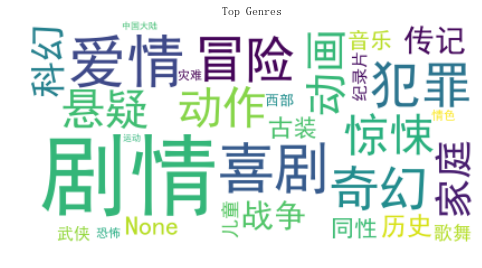

In [12]:
font = r'C:\Windows\Fonts\simhei.ttf'
wordcloud_genres = WordCloud(max_font_size=80, max_words=100, font_path=font, background_color="white", collocations=False).generate(data['movie_type'].to_string())
plt.figure(figsize = (8, 6))
plt.imshow(wordcloud_genres, interpolation="bilinear")
plt.title("Top Genres")
plt.axis("off")
plt.show()

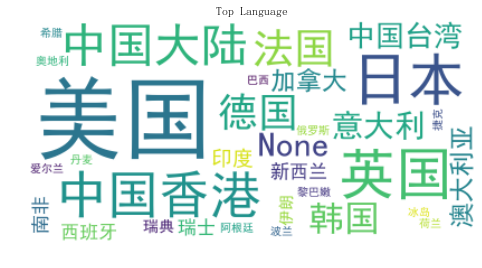

In [13]:
wordcloud_genres = WordCloud(max_font_size=80, max_words=100, font_path=font, background_color="white", collocations=False).generate(data['movie_language'].to_string())
plt.figure(figsize = (8, 6))
plt.imshow(wordcloud_genres, interpolation="bilinear")
plt.title("Top Language")
plt.axis("off")
plt.show()

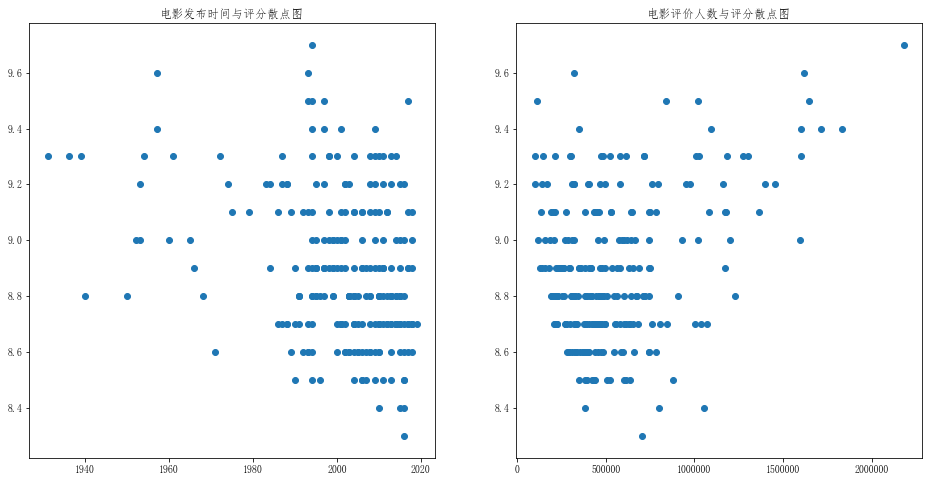

In [14]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['movie_date'].astype(int), data['movie_rate'])
plt.title('电影发布时间与评分散点图');
plt.subplot(1, 2, 2)
plt.scatter(data['movie_rate_count'], data['movie_rate'])
plt.title('电影评价人数与评分散点图');

# Modeling

In [15]:
new_features = ['movie_rate', 'movie_rate_count', 'movie_date']
train = data[new_features]

In [16]:
dummies1 = data['movie_type'].str.get_dummies(sep=' ')
train = pd.concat([train, dummies1], axis=1) 

In [17]:
dummies2 = data['movie_language'].str.get_dummies(sep=' ')
train = pd.concat([train, dummies2], axis=1) 

In [18]:
from sklearn.model_selection  import train_test_split

y = train.movie_rate

X = train.drop(columns=['movie_rate'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(175, 109) (75, 109) (175,) (75,)


## Baseline Model

In [19]:
import math

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

# print_score function depending on the evaluation metric: rmse
def print_score(m):
    res = ['rmse of train: ',rmse(m.predict(X_train), y_train), 'rmse of validation: ', rmse(m.predict(X_test), y_test),
                'r2 of train: ', m.score(X_train, y_train), 'r2 of validation: ', m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append('oob Score: '+str(m.oob_score_))
    print(res)
    
#feature importance to dataframe
def feature_importance(m, df):
    return pd.DataFrame({'字段':df.columns, '重要性':m.feature_importances_}
                       ).sort_values('重要性', ascending=True)
# function to plot feature importance
def plot_fi(fi): return fi.plot('字段','重要性','barh', figsize = (10,8), legend=False)

In [20]:
train_null = train.copy()
train_null['movie_rate'] = train_null['movie_rate'].mean()
y_null = train_null['movie_rate']
rmse_null = rmse(y, y_null)
print("The rmse of the null model is",rmse_null)

The rmse of the null model is 0.26358877062576064


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=999, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True, random_state=99)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=999, n_jobs=-1,
           oob_score=True, random_state=99, verbose=0, warm_start=False)

In [22]:
print_score(rf)

['rmse of train: ', 0.17118155437075663, 'rmse of validation: ', 0.2102378079352437, 'r2 of train: ', 0.5952150701165355, 'r2 of validation: ', 0.28728173559377557, 'oob Score: 0.3325724116126082']


In [23]:
fi = feature_importance(rf, X_train)
fi[-10:]

,字段,重要性
58,日本,0.007377
27,家庭,0.007745
70,韩国,0.010426
65,美国,0.017230
36,爱情,0.017285
7,动作,0.018207
31,惊悚,0.027208
6,剧情,0.029861
1,movie_date,0.302024
0,movie_rate_count,0.506031


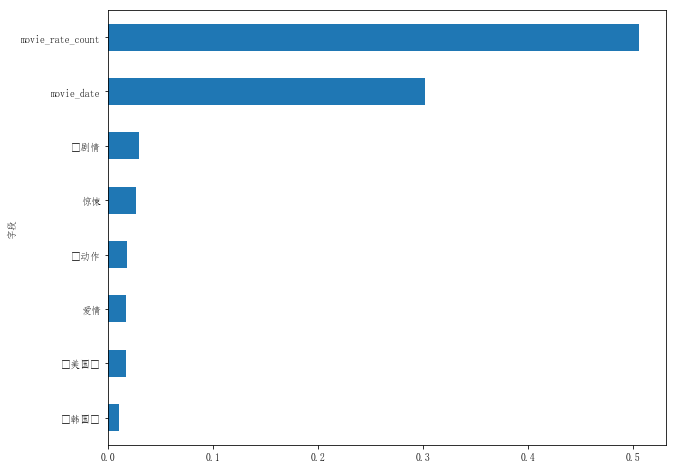

In [24]:
plot_fi(fi[-8:])

## LightGBM Regression 

In [25]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(objective='regression',num_leaves=8,
                              learning_rate=0.05, n_estimators=650,
                              max_bin=58, bagging_fraction=0.80,
                              bagging_freq=5, feature_fraction=0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf=7, min_sum_hessian_in_leaf=11)

In [26]:
X_train['movie_date'] = X_train['movie_date'].astype('int')
X_test['movie_date'] = X_test['movie_date'].astype('int')
lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)],eval_metric='l1',early_stopping_rounds=10)
print_score(lgbm)

C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\86136\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	valid_0's l1: 0.208531	valid_0's l2: 0.0618531
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l1: 0.206708	valid_0's l2: 0.0607158
[3]	valid_0's l1: 0.205216	valid_0's l2: 0.0597865
[4]	valid_0's l1: 0.203345	valid_0's l2: 0.0586927
[5]	valid_0's l1: 0.202799	valid_0's l2: 0.0584321
[6]	valid_0's l1: 0.202705	valid_0's l2: 0.0584074
[7]	valid_0's l1: 0.

In [27]:
booster = lgbm.booster_
importance = booster.feature_importance(importance_type='split')
feature_name = booster.feature_name()
feature_importance = pd.DataFrame({'字段':feature_name,'重要性':importance} ).sort_values('重要性', ascending=True)
feature_importance[-15:]

,字段,重要性
38,科幻,3
29,悬疑,6
9,喜剧,6
18,冒险,7
26,奇幻,12
37,犯罪,12
64,美国,12
58,日本,12
31,惊悚,13
65,美国,14


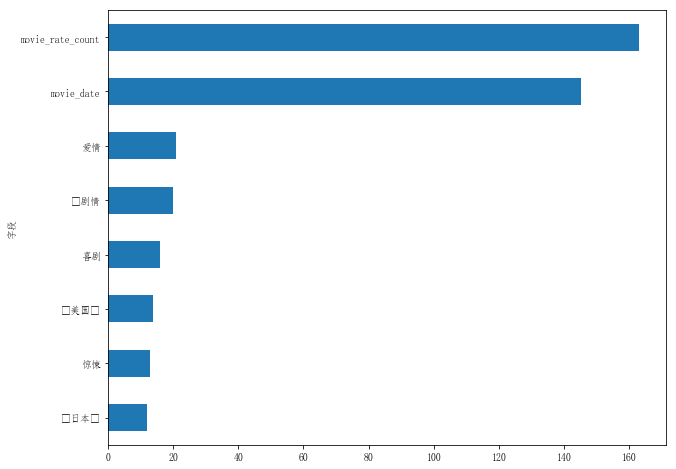

In [28]:
plot_fi(feature_importance[-8:])